In [1]:
from tensorflow.keras.layers import *
import tensorflow as tf

import matplotlib.pyplot as plt

tf.random.set_seed(0)

In [2]:
# load data

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

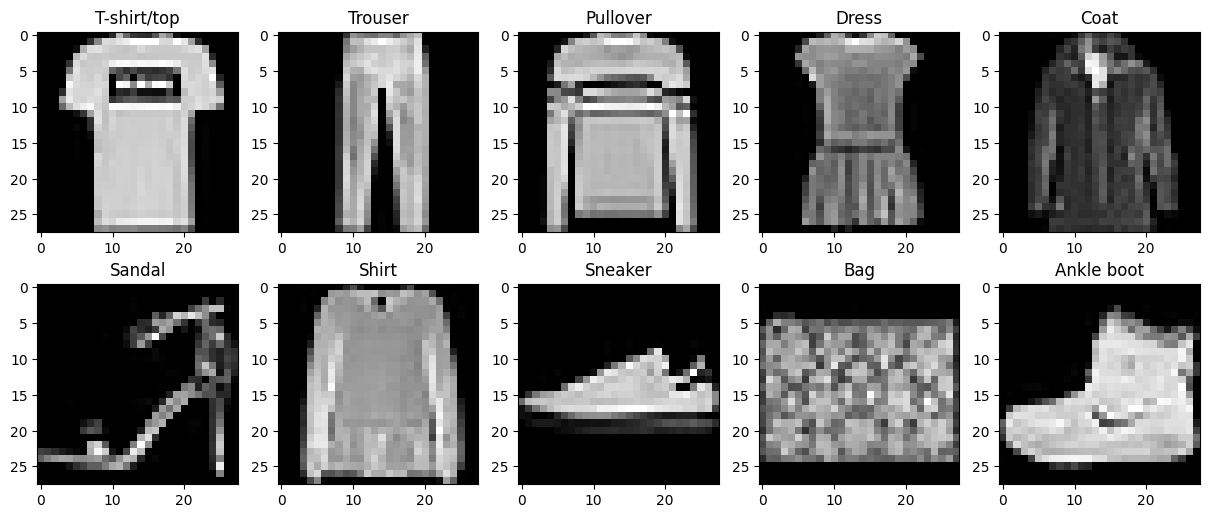

In [3]:
# sample labels

plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[y_train==i][0], cmap='gray')
    plt.title(classes[i])
plt.show()

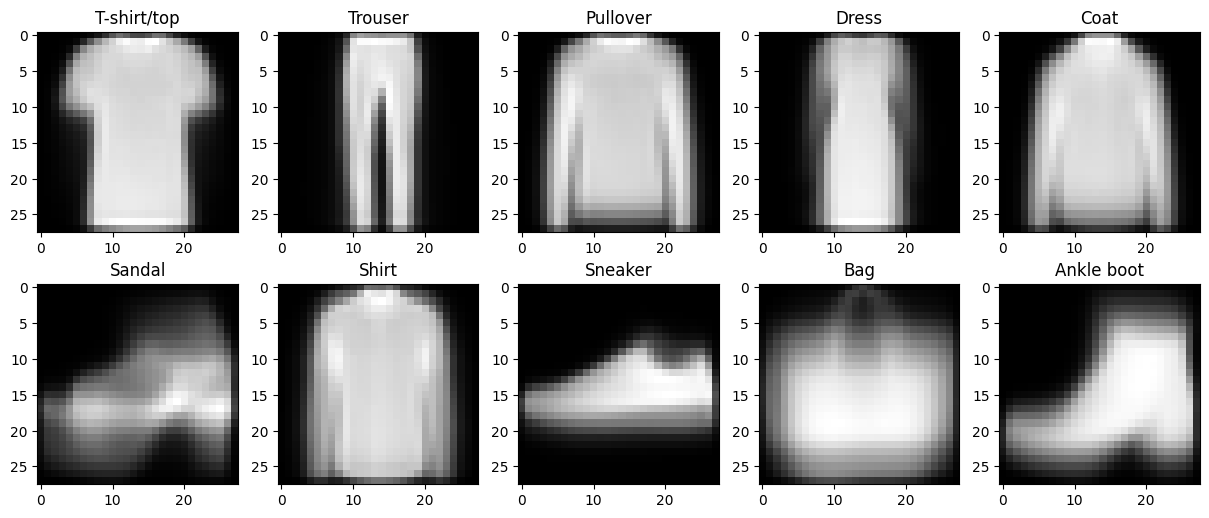

In [4]:
# average view of each labels

plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[y_train==i].mean(axis=0), cmap='gray')
    plt.title(classes[i])
plt.show()

In [5]:
# data processing

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# build model

model = tf.keras.Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 32)       128       
 hNormalization)                                                 
                                                        

In [8]:
# compile and train

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 21s 34ms/step - loss: 0.4232 - accuracy: 0.8459 - val_loss: 0.6279 - val_accuracy: 0.7743
Epoch 2/5
422/422 [==============================] - 13s 32ms/step - loss: 0.2826 - accuracy: 0.8947 - val_loss: 0.3241 - val_accuracy: 0.8752
Epoch 3/5
422/422 [==============================] - 13s 32ms/step - loss: 0.2353 - accuracy: 0.9116 - val_loss: 0.2690 - val_accuracy: 0.9015
Epoch 4/5
422/422 [==============================] - 13s 32ms/step - loss: 0.2080 - accuracy: 0.9218 - val_loss: 0.2594 - val_accuracy: 0.9050
Epoch 5/5
422/422 [==============================] - 18s 43ms/step - loss: 0.1813 - accuracy: 0.9315 - val_loss: 0.2919 - val_accuracy: 0.8957


In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 28ms/step - loss: 0.3213 - accuracy: 0.8879


[0.3213236927986145, 0.8878999948501587]

In [10]:
model.save('models/fashion_mnist.h5')